# Vectors and matrices in Python
Qiskit uses the Python programming language, so before discussing Qiskit specifically it may be helpful to very briefly discuss matrix and vector computations in Python. In Python, matrix and vector computations can be performed using the array class from the NumPy library (which includes many additional components for numerical computation).
Here is an example of a code cell that defines two vectors, ket0 and ket1 , corresponding to the qubit state vectors ∣0⟩ and ∣1⟩, and displays their average.

In [1]:
from numpy import array

ket0 = array([1, 0])
ket1 = array([0, 1])

display(ket0 / 2 + ket1 / 2)

array([0.5, 0.5])

It is not actually necessary to explicitly use the display command to see the result of this computation. We may instead simply write the expression of interest as the last line of the code cell, and it will be returned as its output:

In [2]:
ket0 / 2 + ket1 / 2

array([0.5, 0.5])

We can also use array to create matrices that represent operations.

In [3]:
M1 = array([[1, 1], [0, 0]])
M2 = array([[1, 1], [1, 0]])

M1 / 2 + M2 / 2

array([[1. , 1. ],
       [0.5, 0. ]])

Matrix multiplication (including matrix-vector multiplication as a special case) can be performed using the matmul function from NumPy :

In [4]:
from numpy import matmul

display(matmul(M1, ket1))
display(matmul(M1, M2))
display(matmul(M2, M1))

array([1, 0])

array([[2, 1],
       [0, 0]])

array([[1, 1],
       [1, 1]])

# States, measurements, and operations
Qiskit includes several classes that allow for states, measurements, and operations to be easily created and manipulated.
So starting from scratch and programming everything that is needed to simulate quantum states, measurements, and operations in Python is not required. 
Some examples to get started are included below.

## Defining and displaying state vectors
Qiskit's Statevector class provides functionality for defining and manipulating quantum state vectors. The following code cell imports the Statevector class and defines a few vectors using it. (Note that we need the sqrt function from the NumPy library to compute the square roots for the vector u .)

In [5]:
%pip install qiskit[visualization]

Note: you may need to restart the kernel to use updated packages.


In [6]:
from qiskit.quantum_info import Statevector
from numpy import sqrt

u = Statevector([1 / sqrt(2), 1 / sqrt(2)])
v = Statevector([(1 + 2.0j) / 3, -2 / 3])
w = Statevector([1 / 3, 2 / 3])

print("State vectors u, v, and w have been defined.")

State vectors u, v, and w have been defined.


The Statevector class provides a draw method for displaying state vectors, including latex and text options for different visualizations, as this code cell demonstrates:

In [7]:
display(u.draw("latex"))
display(v.draw("text"))

<IPython.core.display.Latex object>

[ 0.33333333+0.66666667j,-0.66666667+0.j        ]

The Statevector class also includes the is_valid method, which checks to see if a given vector is a valid quantum state vector (i.e., that it has Euclidean norm equal to 1):

In [8]:
display(u.is_valid())
display(w.is_valid())

True

False

## Simulating measurements using Statevector
Next we will see one way that measurements of quantum states can be simulated in Qiskit, using the measure method from the Statevector class.

First, we create a qubit state vector v and then display it.

In [9]:
# Replace the '?' to get the Latex representation below
#####################################################
v = Statevector([(1 + 2.0j) / 3, -2 / 3])
v.draw("latex")

<IPython.core.display.Latex object>

Code cells can be modified — so do not hesitate and go ahead and change the specification of the vector if you wish.

Next, running the measure method simulates a standard basis measurement. It returns the result of that measurement, plus the new quantum state of our system after that measurement.

In [10]:
v.measure()

('0',
 Statevector([0.4472136+0.89442719j, 0.       +0.j        ],
             dims=(2,)))

Measurement outcomes are probabilistic, so the same method can return different results. Try running the cell a few times to see this.

For the particular example of the vector v defined above, the measure method defines the quantum state vector 
after the measurement.
(rather than 

The alternatives are, in fact, equivalent — they are said to differ by a global phase because one is equal to the other multiplied by a complex number on the unit circle. 

As an aside, Statevector will throw an error if the measure method is applied to an invalid quantum state vector. Feel free to give it a try if you're interested in seeing what an error looks like.

Statevector also comes with a sample_counts method that allows for the simulation of any number of measurements on the system. For example, the following cell shows the outcome of measuring the vector v 
1000 times, which (with high probability) results in the outcome 
0 approximately 5 out of every 9 times (or about 556 of the 1000 trials) and the the outcome 1 approximately 4 out of every 9 times (or about 444 out of the 1000 trials). The cell also demonstrates the plot_histogram function for visualizing the results.

{'0': 569, '1': 431}

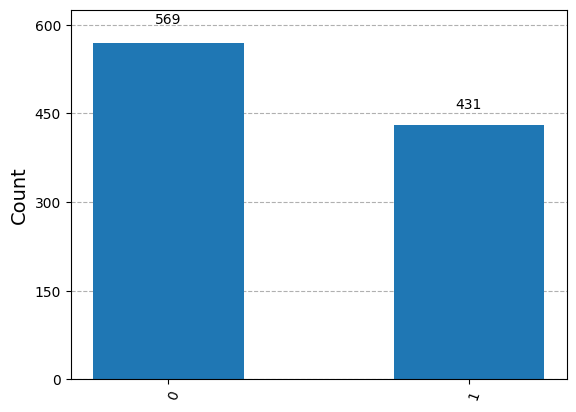

In [11]:
# Replace the '?' 
##################
from qiskit.visualization import plot_histogram

statistics = v.sample_counts(1000)
display(statistics)
plot_histogram(statistics)

Running the cell multiple times and trying different numbers of samples in place of 
1000 may be helpful for developing some intuition for how the number of trials influences the estimated probabilities.

## Performing operations with Operator and Statevector
Unitary operations can be defined and performed on state vectors in Qiskit using the Operator class, as in the example that follows.

In [12]:
# Replace the ? 
###############
from qiskit.quantum_info import Operator

X = Operator([[0, 1], [1, 0]])
Y = Operator([[0, -1j], [1j, 0]])
Z = Operator([[1, 0], [0, -1]])
H = Operator([[1 / sqrt(2), 1 / sqrt(2)], [1 / sqrt(2), -1 / sqrt(2)]])
S = Operator([[1, 0], [0, 1j]])
T = Operator([[1, 0], [0, (1 + 1j) / sqrt(2)]])

v = Statevector([1, 0])

# Apply the following operation: ZTHTHv in which the uppercase characters are Unitary Matrices.
# The lower case characters are column vectors. 

v = v.evolve(Z)
v = v.evolve(T)
v = v.evolve(H)
v = v.evolve(T)
v = v.evolve(H)

v.draw("text")

[0.85355339+0.35355339j,0.14644661-0.35355339j]

## Looking ahead toward quantum circuits
We will experiment with composing qubit unitary operations using Qiskit's QuantumCircuit class. In particular, we may define a quantum circuit (which in this case will simply be a sequence of unitary operations performed on a single qubit) as follows.

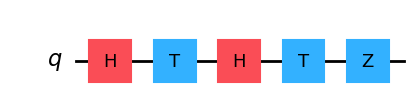

In [13]:
from qiskit import QuantumCircuit

circuit = QuantumCircuit(1)

circuit.h(0)
circuit.t(0)
circuit.h(0)
circuit.t(0)
circuit.z(0)

circuit.draw('mpl')

The operations are applied sequentially, starting on the left and ending on the right in the figure. Let us first initialize a starting quantum state vector and then evolve that state according to the sequence of operations.

In [15]:
# Replace the '?'
##################
ket0 = Statevector([1, 0])
v = ket0.evolve(Z @ T @ H @ T @ H)
v.draw("text")

[ 0.85355339+0.35355339j,-0.35355339+0.14644661j]

Finally, let's simulate the result of running this experiment (i.e., preparing the state ∣0⟩, applying the sequence of operations represented by the circuit, and measuring) 4000 times.

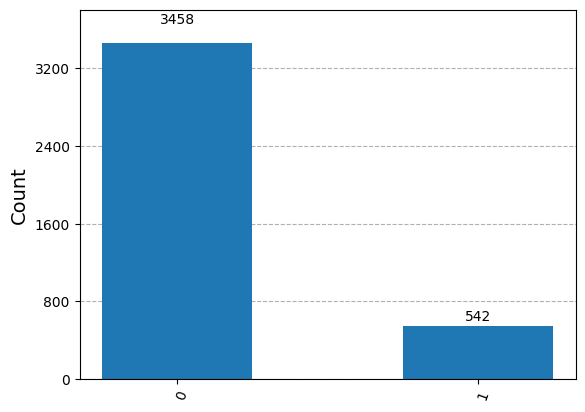

In [16]:
# Replace the '?'
##################
statistics = v.sample_counts(4000)
plot_histogram(statistics)

# End of Notebook

#### Author
Gaius Julius Caesar